In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import scipy

In [2]:
#Loading Datasets

#Function to load and prepare the hotel dataset
def load_hotel():

    '''Load Hotel Dataset
    
    Returns:
    X (np.array): X array
    Y (np.array): Y array
    col_index (dict): Dictionary containing the pairing for the column location and it's name'''

    df=pd.read_csv('Data/Hotel_Res/Hotel Reservations.csv')
    df=df.drop('arrival_year',axis=1) #Remove Year
    df['season']=df['arrival_month'].apply(lambda x:1 if (x>=4 and x<=9) else 0) #0-Summer, 1-Winter
    df.drop('arrival_month',inplace=True,axis=1)
    df['point_in_month']=df['arrival_date'].apply(lambda x:1 if (x<=15) else 0) #0-eralier in the month,1-later

    #Removing Booking ID as it not a usefull feature
    df=df.drop('Booking_ID',axis=1)

    #Creating the labels (Y)
    Y=np.array(df['booking_status'].apply(lambda x:0 if x=='Not_Canceled' else 1)) #0 if not canceled, 1 if canceled

    df.drop('booking_status',inplace=True,axis=1)

    #Creating the feature vector, X 
    label_columns=['booking_status']
    categorical_columns=['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
    non_categorical_variables=list(set(df.columns).difference(set(categorical_columns+label_columns)))
    X=np.array(df[non_categorical_variables])
    columns_categorized=non_categorical_variables

    #Now we need to one hot vectorize the type_of_meal_plan, room_type_reserved and market_segment_type
    label_dict={}
    for i in categorical_columns:
        label_dict[i]=OneHotEncoder()
        res=label_dict[i].fit_transform(np.array(df[i]).reshape(-1,1)).toarray()
        X=np.c_[X,res]
        columns_categorized=columns_categorized+[i+'%'+j for j in ['1','2','3','4','5','6','7'][:res.shape[-1]]]

        col_index={}
        results_corr={}
        for label,col in zip(columns_categorized,range(X.shape[-1])):
            corr=scipy.stats.pearsonr(X[:,col],Y)[0]
            results_corr[label]=corr
            col_index[label]=col

    return X,Y,col_index

#Function to load and prepare the heart dataset
def load_heart_data():

    '''Load Heart Disease Dataset
    
    Returns:
    X (np.array): X array
    Y (np.array): Y array
    col_index (dict): Dictionary containing the pairing for the column location and it's name'''

    df=pd.read_csv('Data/Heart_2/heart.csv')
    Y=np.array(df['HeartDisease'])
    df.drop('HeartDisease',axis=1,inplace=True)
    
    label_columns=['HeartDisease']
    categorical_columns=['Sex', 'ChestPainType', 'RestingECG','ExerciseAngina','ST_Slope']

    non_categorical_variables=list(set(df.columns).difference(set(categorical_columns+label_columns)))
    X=np.array(df[non_categorical_variables])
    columns_categorized=non_categorical_variables

    #Now we need to one hot vectorize the type_of_meal_plan, room_type_reserved and market_segment_type
    label_dict={}
    for i in categorical_columns:
        label_dict[i]=OneHotEncoder()
        res=label_dict[i].fit_transform(np.array(df[i]).reshape(-1,1)).toarray()
        X=np.c_[X,res]
        columns_categorized=columns_categorized+[i+'%'+j for j in ['1','2','3','4','5','6','7'][:res.shape[-1]]]

        col_index={}
        results_corr={}
        for label,col in zip(columns_categorized,range(X.shape[-1])):
            corr=scipy.stats.pearsonr(X[:,col],Y)[0]
            results_corr[label]=corr
            col_index[label]=col

    return X,Y,col_index

In [3]:
X_hotel,Y_hotel,hotel_index=load_hotel()
X_heart,Y_heart,heart_index=load_heart_data()

Text(0.5, 0, 'Pie Chart for Data Type')

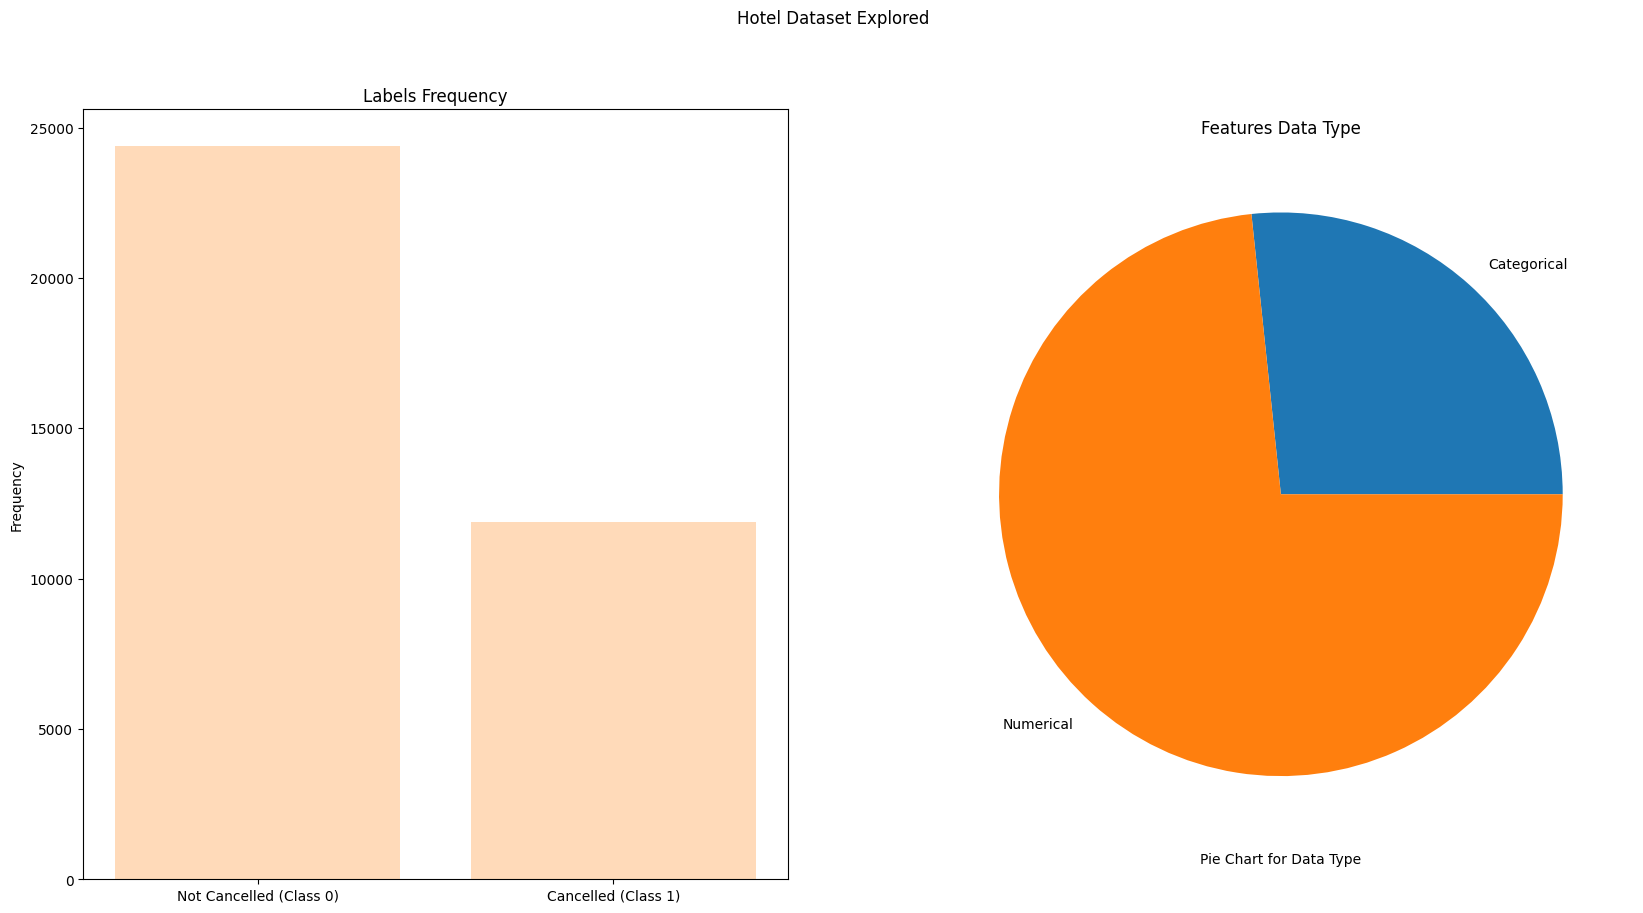

In [6]:
fig,axes=plt.subplots(1,2)
fig.set_size_inches(20,10)
plt.suptitle('Hotel Dataset Explored')


#Plotting bar
axes[0].set_title('Labels Frequency')

x_vals=['Not Cancelled (Class 0)','Cancelled (Class 1)']
y_vals=[len(Y_hotel[Y_hotel==0]),len(Y_hotel[Y_hotel==1])]

axes[0].bar(x_vals,y_vals,color='peachpuff')
axes[0].set_ylabel('Frequency')

#Plotting Pie

#Count for Categories
cols=['Categorical','Numerical']
nums=[4,11]

axes[1].set_title('Features Data Type')
axes[1].pie(nums,labels=cols);
axes[1].set_xlabel('Pie Chart for Data Type')

Text(0.5, 0, 'Pie Chart for Data Type')

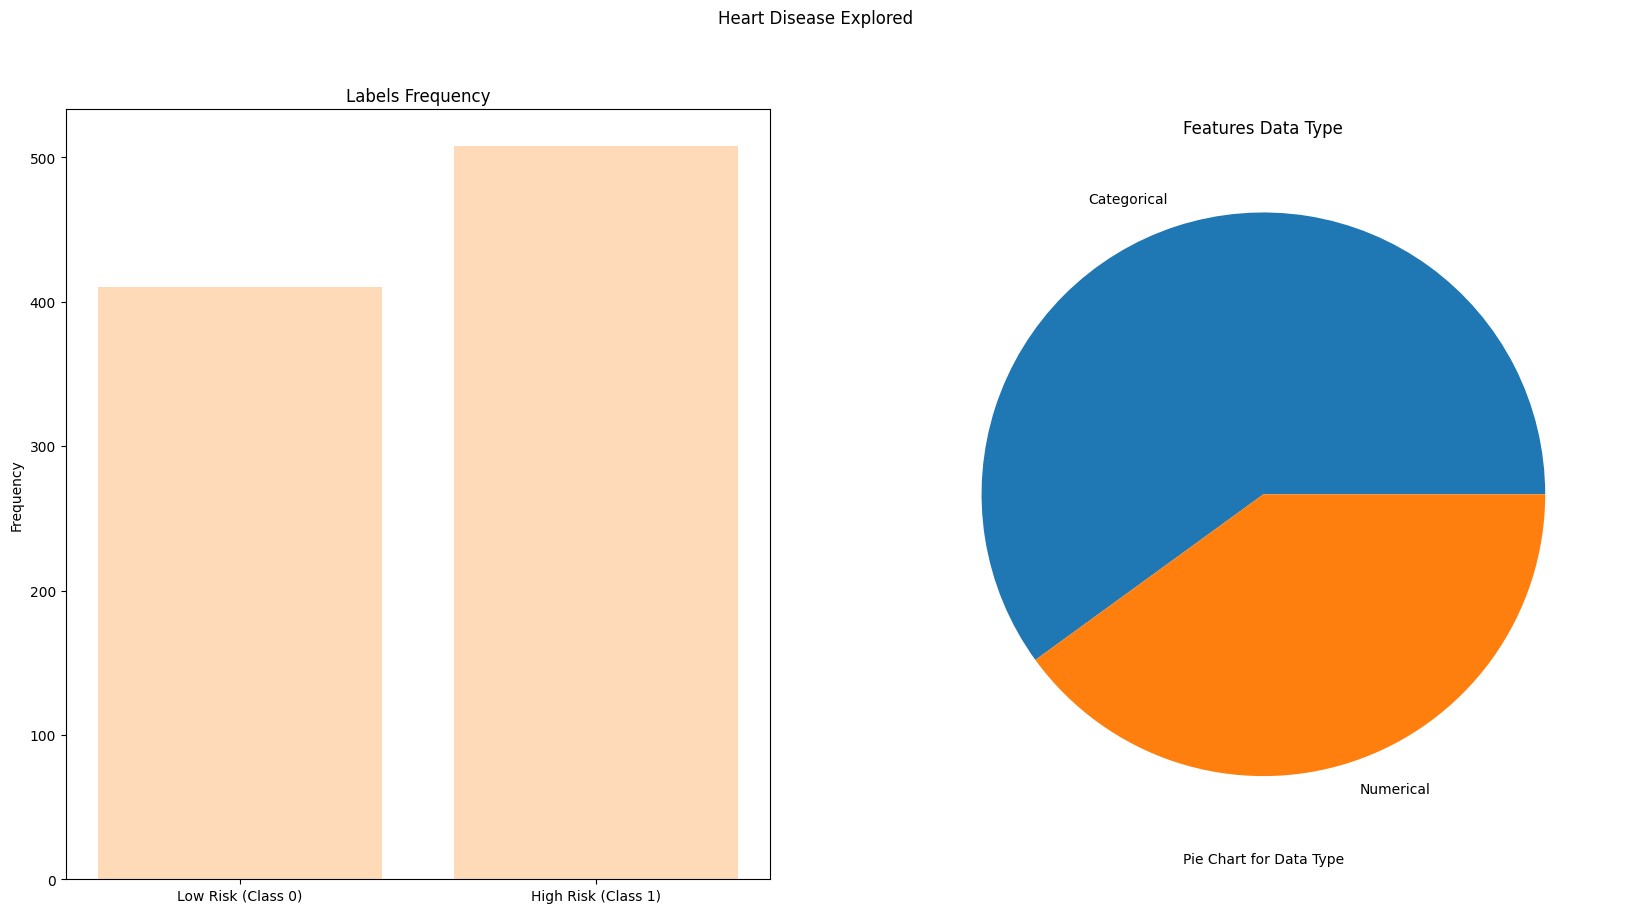

In [7]:
fig,axes=plt.subplots(1,2)
fig.set_size_inches(20,10)
plt.suptitle('Heart Disease Explored')


#Plotting bar
axes[0].set_title('Labels Frequency')

x_vals=['Low Risk (Class 0)','High Risk (Class 1)']
y_vals=[len(Y_heart[Y_heart==0]),len(Y_heart[Y_heart==1])]

axes[0].bar(x_vals,y_vals,color='peachpuff')
axes[0].set_ylabel('Frequency')

#Plotting Pie

#Count for Categories
cols=['Categorical','Numerical']
nums=[6,4]

axes[1].set_title('Features Data Type')
axes[1].pie(nums,labels=cols);
axes[1].set_xlabel('Pie Chart for Data Type')

In [4]:
from sklearn.datasets import make_hastie_10_2
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.inspection import PartialDependenceDisplay


clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_hotel, Y_hotel)

In [ ]:
done=[]
inv_map = {v: k for k, v in hotel_index.items()}
for i in np.arange(len(hotel_index.keys())):
    for j in np.arange(len(hotel_index.keys())):
        if i==j or (i,j) in done:
            continue
        else:
            try:
                plt.figure()
                plt.title('{} and {}'.format(inv_map[i],inv_map[j]))
                features = [i, j, (i, j)]
                axes=plt.gca()
                PartialDependenceDisplay.from_estimator(clf, X_hotel, features,ax=axes)
                done.append([i,j])
                done.append([j,i])
                plt.savefig('Images/hotel_interaction/{} & {}'.format(inv_map[i],inv_map[j]))
                plt.close()
            except:
                pass

In [54]:
clf_2 = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1, random_state=0).fit(X_heart, Y_heart)

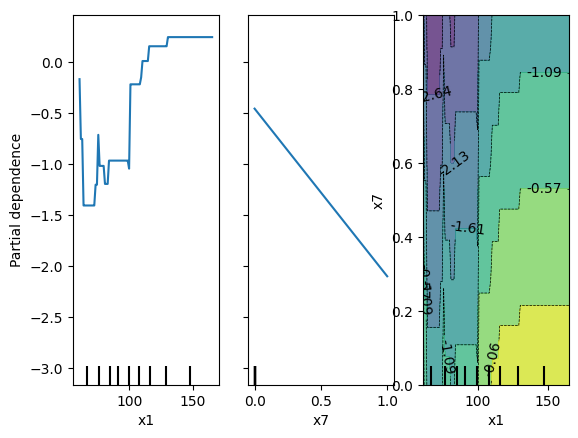

In [58]:
features = [1, 7, (1, 7)]
PartialDependenceDisplay.from_estimator(clf, X_hotel, features)

In [55]:
heart_index

{'Oldpeak': 0,
 'Age': 1,
 'MaxHR': 2,
 'FastingBS': 3,
 'RestingBP': 4,
 'Cholesterol': 5,
 'Sex%1': 6,
 'Sex%2': 7,
 'ChestPainType%1': 8,
 'ChestPainType%2': 9,
 'ChestPainType%3': 10,
 'ChestPainType%4': 11,
 'RestingECG%1': 12,
 'RestingECG%2': 13,
 'RestingECG%3': 14,
 'ExerciseAngina%1': 15,
 'ExerciseAngina%2': 16,
 'ST_Slope%1': 17,
 'ST_Slope%2': 18,
 'ST_Slope%3': 19}